In [ ]:
import pandas as pd
from google.colab import files
import re
from wordcloud import WordCloud
import nltk
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk import word_tokenize
nltk.download(['punkt','wordnet','stopwords'])
import matplotlib.pyplot as plt
import emoji
# pyLDAvis c'est pour la visualisation 

import pyLDAvis.gensim_models as gensimvis
import pyLDAvis



/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from gensim.utils import simple_preprocess


from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

from gensim.corpora import Dictionary
from gensim.models import LdaModel

from gensim.models import CoherenceModel

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path_1= '/content/drive/MyDrive/csv_discord/aide_aux_devoirs.csv'
path_2= '/content/drive/MyDrive/csv_discord/general.csv'
path_3= '/content/drive/MyDrive/csv_discord/hors_sujet.csv'
path_4= '/content/drive/MyDrive/csv_discord/nlp.csv'
path_5= '/content/drive/MyDrive/csv_discord/projet_demo.csv'

data_1 = pd.read_csv(path_1, sep = ",", encoding="utf-8")
data_2 = pd.read_csv(path_2, sep = ",", encoding="utf-8")
data_3 = pd.read_csv(path_3, sep = ",", encoding="utf-8")
data_4 = pd.read_csv(path_4, sep = ",", encoding="utf-8")
data_5 = pd.read_csv(path_5, sep = ",", encoding="utf-8")

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data = pd.concat([data_1, data_2, data_3, data_4, data_5])


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data.shape

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(2204, 6)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data.head()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,AuthorID,Author,Date,Content,Attachments,Reactions
0,504196704854343691,lao#7908,11/09/2022 10:38 PM,Salut les gens j espere que vous allez tous bi...,NaN,NaN
1,864907830934765569,Camille (they/iel)#3944,11/09/2022 10:39 PM,Hello pas encore :/,NaN,NaN
2,1039525770231562301,Nadjet_Sm#9864,11/09/2022 10:39 PM,"Coucou, Pas encore",NaN,NaN
3,1037719296396230806,Quentin_Lo#0472,11/09/2022 10:40 PM,"salut, pas encore aussi ^^'",NaN,NaN
4,504196704854343691,lao#7908,11/09/2022 10:46 PM,Merci pour vos retours au moins je sais que ce...,NaN,NaN


In [ ]:
data.dtypes

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


AuthorID        int64
Author         object
Date           object
Content        object
Attachments    object
Reactions      object
dtype: object

In [ ]:
data.isna().sum()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


AuthorID          0
Author            0
Date              0
Content         185
Attachments    1990
Reactions      1837
dtype: int64

In [ ]:

data["Author"]=data["Author"].apply(lambda x: x.split("#")[0])

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.9/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 3675 (\N{THAI CHARACTER KHOMUT}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3675 (\N{THAI CHARACTER KHOMUT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


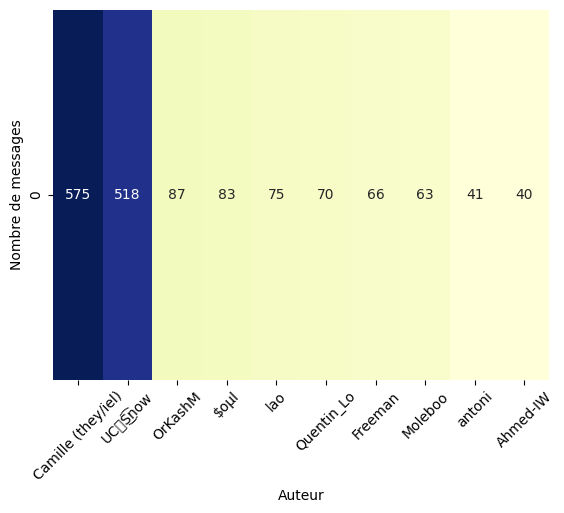

In [ ]:
# Compter le nombre de messages postés par chaque auteur
author_counts = data["Author"].value_counts()

# Convertir les données en une matrice de 1xN pour pouvoir tracer une carte thermique
heatmap_data = pd.DataFrame(author_counts.values.reshape(1, -1), columns=author_counts.index)

# Sélectionner les 10 auteurs ayant posté le plus grand nombre de messages
top_10_authors = author_counts.iloc[:10]

# Filtrer la matrice pour ne conserver que les 10 premiers auteurs
heatmap_data = heatmap_data[top_10_authors.index]

# Tracer une carte thermique avec une palette de couleurs appropriée
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt="d", cbar=False)
plt.xticks(rotation=45)
plt.xlabel("Auteur")
plt.ylabel("Nombre de messages")
plt.show()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data[data["Content"].isna()]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,AuthorID,Author,Date,Content,Attachments,Reactions
22,1039327866120327329,Ahmed-IW,11/20/2022 12:15 PM,NaN,https://cdn.discordapp.com/attachments/1039627...,NaN
61,957409785400164384,UC๛S͜͡now,12/04/2022 11:18 AM,NaN,https://cdn.discordapp.com/attachments/1039627...,NaN
103,776137688100241458,Moleboo,01/09/2023 11:55 AM,NaN,https://cdn.discordapp.com/attachments/1039627...,NaN
131,828875893014790194,antoni,01/18/2023 10:31 AM,NaN,https://cdn.discordapp.com/attachments/1039627...,👍 (6)
134,864907830934765569,Camille (they/iel),01/24/2023 4:44 PM,NaN,https://cdn.discordapp.com/attachments/1039627...,NaN
...,...,...,...,...,...,...
429,298170534464585730,$oµl,04/14/2023 12:22 PM,NaN,https://cdn.discordapp.com/attachments/1083698...,NaN
434,298170534464585730,$oµl,04/14/2023 2:18 PM,NaN,https://cdn.discordapp.com/attachments/1083698...,NaN
435,957409785400164384,UC๛S͜͡now,04/14/2023 2:22 PM,NaN,https://cdn.discordapp.com/attachments/1083698...,NaN
441,690615834980384858,Sara58143,04/14/2023 5:39 PM,NaN,https://cdn.discordapp.com/attachments/1083698...,NaN


In [ ]:
data.drop(["AuthorID",	"Date",	"Attachments"],axis=1,inplace=True)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data.head()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Author,Content,Reactions
0,lao,Salut les gens j espere que vous allez tous bi...,NaN
1,Camille (they/iel),Hello pas encore :/,NaN
2,Nadjet_Sm,"Coucou, Pas encore",NaN
3,Quentin_Lo,"salut, pas encore aussi ^^'",NaN
4,lao,Merci pour vos retours au moins je sais que ce...,NaN


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Author
Camille (they/iel)    110
UC๛S͜͡now              85
Moleboo                17
$oµl                   15
lao                    15
Quentin_Lo             13
antoni                 10
OrKashM                 9
Salut_Anes              7
yopa                    7
ALI SL                  7
Giusfer                 5
Spoofy                  5
Ahmed-IW                5
Kakpo_YEHOSSOU          5
charaf abrit            4
Théodore F.             4
Firemaki                4
Simple Poll             4
Sara58143               4
Freeman                 3
Wiz Kevin               3
Flavie                  3
Ryan_Agz                3
ayoub_gh                2
Safaa Boulaich          2
Achraf                  2
Zak spow                2
~Twenty~                2
Fadi                    2
Jérémi VESPUCE          2
Nadjet_Sm               2
Yanis_21                1
abdoupitou              1
Bouz                    1
Crixian91               1
FredBoat♪♪              0
Hydra                   0
MOSES

In [ ]:
data["Author"].value_counts()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Camille (they/iel)    624
UC๛S͜͡now             574
$oµl                   97
OrKashM                88
lao                    79
Quentin_Lo             78
Moleboo                68
Freeman                67
antoni                 49
Ahmed-IW               43
Salut_Anes             41
Théodore F.            41
yopa                   37
Sara58143              33
Kakpo_YEHOSSOU         29
Spoofy                 26
Crixian91              22
Firemaki               20
ALI SL                 19
Bouz                   15
Ryan_Agz               14
Jérémi VESPUCE         14
Nadjet_Sm              14
Yanis_21               13
Achraf                 12
Wiz Kevin              11
charaf abrit            9
Flavie                  8
Giusfer                 8
~Twenty~                6
Safaa Boulaich          6
Sylouuu                 6
Simple Poll             5
Fadi                    4
Zak spow                4
ayoub_gh                4
Regis                   3
abdoupitou              2
MOSES       

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#supprimer la valeur "Joined the server"
data = data[data["Content"].notnull() & (data["Content"] != "Joined the server.")]


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#supprimer les robots
mask = data['Content'].str.contains('ProBot|Hydra|FredBoat|Ear Tensifie|Simple Poll')
data = data[~mask]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#supprimer les emojis
def remove_emoji(text):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

data['Content'] = data['Content'].apply(remove_emoji)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data.head()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Author,Content,Reactions
0,lao,Salut les gens j espere que vous allez tous bi...,NaN
1,Camille (they/iel),Hello pas encore :/,NaN
2,Nadjet_Sm,"Coucou, Pas encore",NaN
3,Quentin_Lo,"salut, pas encore aussi ^^'",NaN
4,lao,Merci pour vos retours au moins je sais que ce...,NaN


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data.head()


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Author,Content,Reactions
0,lao,Salut les gens j espere que vous allez tous bi...,NaN
1,Camille (they/iel),Hello pas encore :/,NaN
2,Nadjet_Sm,"Coucou, Pas encore",NaN
3,Quentin_Lo,"salut, pas encore aussi ^^'",NaN
4,lao,Merci pour vos retours au moins je sais que ce...,NaN


In [ ]:

# Supprimer les caractères de ponctuation sauf l'apostrophe
data["Content"] = data["Content"].apply(lambda x: re.sub(r'[^\w\s\']', '', x))

# Mettre en minuscule
data["Content"] = data["Content"].apply(lambda x: x.lower())

# Supprimer les numéros
data["Content"] = data["Content"].apply(lambda x: re.sub(r'\d+', '', x))

# Supprimer les adresses mails
data["Content"] = data["Content"].apply(lambda x: re.sub(r'\S+@\S+', '', x))

# Supprimer les URLs
data["Content"] = data["Content"].apply(lambda x: re.sub(r'http\S+', '', x))


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data.head()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Author,Content,Reactions
0,lao,salut les gens j espere que vous allez tous bi...,NaN
1,Camille (they/iel),hello pas encore,NaN
2,Nadjet_Sm,coucou pas encore,NaN
3,Quentin_Lo,salut pas encore aussi ',NaN
4,lao,merci pour vos retours au moins je sais que ce...,NaN


In [ ]:
#tokenization
data['Content']=data['Content'].map(lambda x: word_tokenize(x))


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data["Content"]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0     [salut, les, gens, j, espere, que, vous, allez...
1                                  [hello, pas, encore]
2                                 [coucou, pas, encore]
3                        [salut, pas, encore, aussi, ']
4     [merci, pour, vos, retours, au, moins, je, sai...
                            ...                        
15                                            [merciii]
16    [oui, c'est, dans, le, même, couloir, du, bure...
17    [quelle, drôle, de, question, et, dans, ce, ch...
18    [euh, le, cours, en, question, est, un, cours,...
19                                        [er, diagram]
Name: Content, Length: 1972, dtype: object

In [ ]:
french_stopwords=stopwords.words('french')
data['Content']=data.Content.apply(lambda x:[item for item in x if item not in french_stopwords])
data['Content']

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0     [salut, gens, espere, allez, tous, bien, quelq...
1                                       [hello, encore]
2                                      [coucou, encore]
3                             [salut, encore, aussi, ']
4     [merci, retours, moins, sais, probleme, perso,...
                            ...                        
15                                            [merciii]
16       [oui, c'est, couloir, bureau, étienne, gauche]
17               [quelle, drôle, question, channel, xd]
18          [euh, cours, question, cours, projet, démo]
19                                        [er, diagram]
Name: Content, Length: 1972, dtype: object

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Créer un dictionnaire de mots

#le dictionnaire créé  contient tous les mots uniques de l'ensemble de données.

dictionary = Dictionary(data["Content"])

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Créer un corpus de documents

#La méthode "doc2bow" transforme chaque liste de mots prétraités en un sac de mots, 

#c'est-à-dire un vecteur de paires (mot_id, fréquence) qui représente le nombre d'occurrences de chaque mot dans le document.

corpus = [dictionary.doc2bow(text) for text in data["Content"]]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
corpus

In [ ]:
#mesure la similarité entre les mots dans un sujet donné en utilisant la log-probabilité négative de ces mots

#Plus la valeur de UMass est proche de zéro, plus le modèle est cohérent.
cohereence_liste = []

for K in range(1,6):
    lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=K)
    coherence_model = CoherenceModel(model=lda_model, corpus=corpus, coherence='u_mass')
    
    # Calculate the coherence score for the topics
    cohereence_liste.append(coherence_model.get_coherence())

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
cohereence_liste

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[-9.349607837435764,
 -8.269696612057738,
 -9.087633907089346,
 -9.39714424311563,
 -9.46967044136399]

In [ ]:
# la valeur proche du 0 c'est le nombre optimal des topics

min_value = max(cohereence_liste)
optimal_topics_number = cohereence_liste.index(min_value)+1

optimal_topics_number

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


2

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


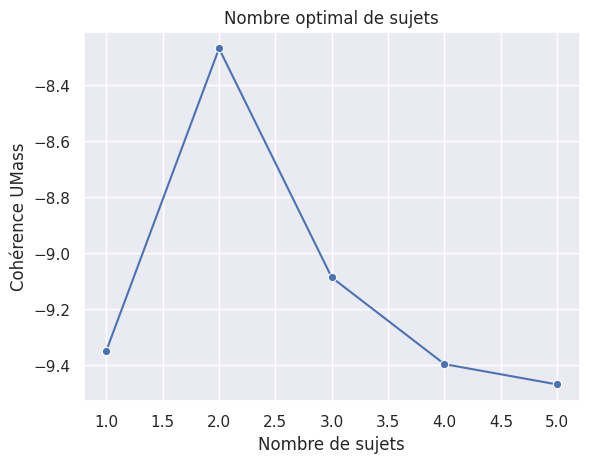

In [ ]:
# Tracer le graphique
sns.set(style="darkgrid")
sns.lineplot(x=range(1,6), y=cohereence_liste, marker="o")
plt.title('Nombre optimal de sujets')
plt.xlabel('Nombre de sujets')
plt.ylabel('Cohérence UMass')
plt.show()

In [ ]:
# Afficher les sujets 

# cela nous donne chaque termm avec le pourcentage d'existance par rapport au document 
topics = lda_model.show_topics(num_topics=2, num_words=10)
for topic in topics:
    print(topic)

(0, '0.010*"a" + 0.008*"cours" + 0.007*"demain" + 0.007*"fait" + 0.006*"import" + 0.006*"faire" + 0.006*"c\'est" + 0.005*"md_student" + 0.005*"si" + 0.005*"prof"')
(1, '0.021*"\'" + 0.012*"a" + 0.010*"everyone" + 0.010*"ça" + 0.009*"c\'est" + 0.008*"merci" + 0.007*"import" + 0.007*"j\'ai" + 0.006*"si" + 0.006*"faire"')


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
K=2

lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=K)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
!pip install pyLDAvis==3.3.1


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 24.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136896 sha256=710466cb8622de9fdbcde78f3662a98f81246ea72f5934dfb84774d6762ef6c5
  Stored in directory: /root/.cache/pip/wheels/57/a4/86/d10c6c2e0bf149fbc0afb0aa5a6528ac35b30a133a0270c477
  Created wheel for sklearn: filename=sklearn-0.0.post4-py3-none-any.whl size=2973 sha256=a36a3cddd67a780f8a97b4aec2d3ea62b970e7ce522e81c6e63fa167057b76c8
  Stored in directory: /root/.cache/pip/wheels/d5/b2/a9/590d15767d34955f20a9a033e8db973b79cb5672d95790c0a9
Successfully built pyLDAvis sklearn
  Attempting uninstall: pyLDAvis
    Fo

In [ ]:
from IPython.display import display

# Générer la visualisation pyLDAvis
vis = gensimvis.prepare(lda_model, corpus, dictionary)

# Afficher la visualisation
display(pyLDAvis.display(vis))

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.9/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
